# 과대적합과 과소적합

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

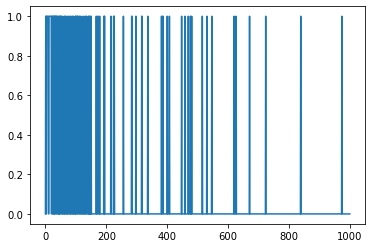

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5651 - accuracy: 0.7246 - binary_crossentropy: 0.5651 - val_loss: 0.4205 - val_accuracy: 0.8243 - val_binary_crossentropy: 0.4205
Epoch 2/20
49/49 - 0s - loss: 0.3612 - accuracy: 0.8493 - binary_crossentropy: 0.3612 - val_loss: 0.3414 - val_accuracy: 0.8571 - val_binary_crossentropy: 0.3414
Epoch 3/20
49/49 - 0s - loss: 0.3190 - accuracy: 0.8674 - binary_crossentropy: 0.3190 - val_loss: 0.3320 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3320
Epoch 4/20
49/49 - 0s - loss: 0.3067 - accuracy: 0.8726 - binary_crossentropy: 0.3067 - val_loss: 0.3289 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3289
Epoch 5/20
49/49 - 0s - loss: 0.3016 - accuracy: 0.8760 - binary_crossentropy: 0.3016 - val_loss: 0.3302 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3302
Epoch 6/20
49/49 - 0s - loss: 0.2979 - accuracy: 0.8777 - binary_crossentropy: 0.2979 - val_loss: 0.3316 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3316
Epoch 7/20
49/49 - 0s - loss

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6630 - accuracy: 0.5996 - binary_crossentropy: 0.6630 - val_loss: 0.6281 - val_accuracy: 0.6823 - val_binary_crossentropy: 0.6281
Epoch 2/20
49/49 - 0s - loss: 0.5898 - accuracy: 0.7392 - binary_crossentropy: 0.5898 - val_loss: 0.5576 - val_accuracy: 0.7778 - val_binary_crossentropy: 0.5576
Epoch 3/20
49/49 - 0s - loss: 0.5228 - accuracy: 0.8118 - binary_crossentropy: 0.5228 - val_loss: 0.5007 - val_accuracy: 0.8306 - val_binary_crossentropy: 0.5007
Epoch 4/20
49/49 - 0s - loss: 0.4690 - accuracy: 0.8475 - binary_crossentropy: 0.4690 - val_loss: 0.4614 - val_accuracy: 0.8316 - val_binary_crossentropy: 0.4614
Epoch 5/20
49/49 - 0s - loss: 0.4281 - accuracy: 0.8607 - binary_crossentropy: 0.4281 - val_loss: 0.4250 - val_accuracy: 0.8532 - val_binary_crossentropy: 0.4250
Epoch 6/20
49/49 - 0s - loss: 0.3947 - accuracy: 0.8701 - binary_crossentropy: 0.3947 - val_loss: 0.4011 - val_accuracy: 0.8565 - val_binary_crossentropy: 0.4011
Epoch 7/20
49/49 - 0s - loss

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4373 - accuracy: 0.7923 - binary_crossentropy: 0.4373 - val_loss: 0.3322 - val_accuracy: 0.8570 - val_binary_crossentropy: 0.3322
Epoch 2/20
49/49 - 0s - loss: 0.2878 - accuracy: 0.8799 - binary_crossentropy: 0.2878 - val_loss: 0.3209 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3209
Epoch 3/20
49/49 - 0s - loss: 0.2261 - accuracy: 0.9113 - binary_crossentropy: 0.2261 - val_loss: 0.3422 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3422
Epoch 4/20
49/49 - 0s - loss: 0.1069 - accuracy: 0.9676 - binary_crossentropy: 0.1069 - val_loss: 0.4221 - val_accuracy: 0.8458 - val_binary_crossentropy: 0.4221
Epoch 5/20
49/49 - 0s - loss: 0.0234 - accuracy: 0.9961 - binary_crossentropy: 0.0234 - val_loss: 0.5432 - val_accuracy: 0.8490 - val_binary_crossentropy: 0.5432
Epoch 6/20
49/49 - 0s - loss: 0.0053 - accuracy: 0.9996 - binary_crossentropy: 0.0053 - val_loss: 0.6253 - val_accuracy: 0.8522 - val_binary_crossentropy: 0.6253
Epoch 7/20
49/49 - 0s - loss

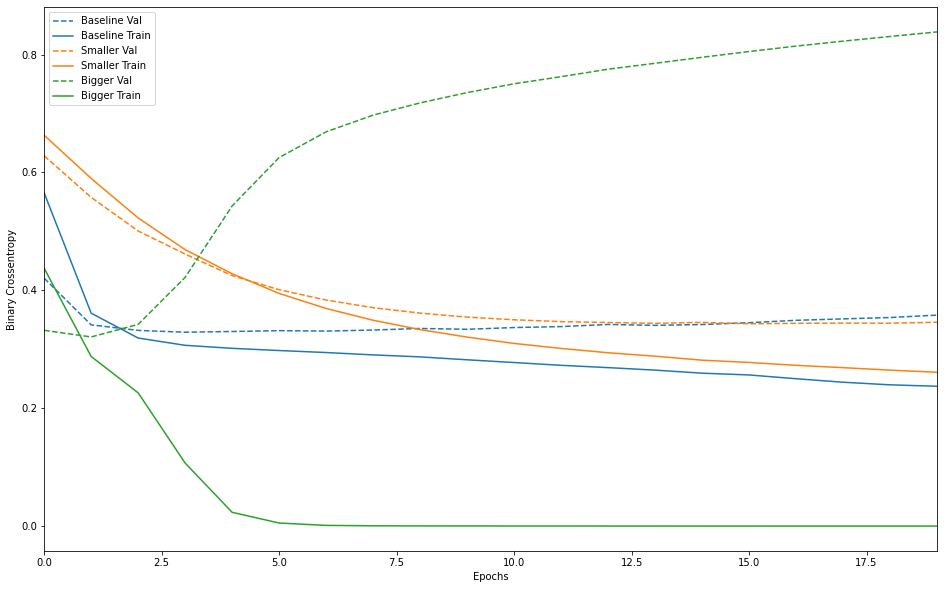

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6108 - accuracy: 0.7168 - binary_crossentropy: 0.5666 - val_loss: 0.4744 - val_accuracy: 0.8158 - val_binary_crossentropy: 0.4315
Epoch 2/20
49/49 - 0s - loss: 0.4093 - accuracy: 0.8478 - binary_crossentropy: 0.3666 - val_loss: 0.3847 - val_accuracy: 0.8561 - val_binary_crossentropy: 0.3427
Epoch 3/20
49/49 - 0s - loss: 0.3633 - accuracy: 0.8680 - binary_crossentropy: 0.3223 - val_loss: 0.3709 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3310
Epoch 4/20
49/49 - 0s - loss: 0.3500 - accuracy: 0.8709 - binary_crossentropy: 0.3110 - val_loss: 0.3660 - val_accuracy: 0.8613 - val_binary_crossentropy: 0.3279
Epoch 5/20
49/49 - 0s - loss: 0.3437 - accuracy: 0.8730 - binary_crossentropy: 0.3064 - val_loss: 0.3653 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3290
Epoch 6/20
49/49 - 0s - loss: 0.3397 - accuracy: 0.8748 - binary_crossentropy: 0.3041 - val_loss: 0.3619 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3272
Epoch 7/20
49/49 - 0s - loss

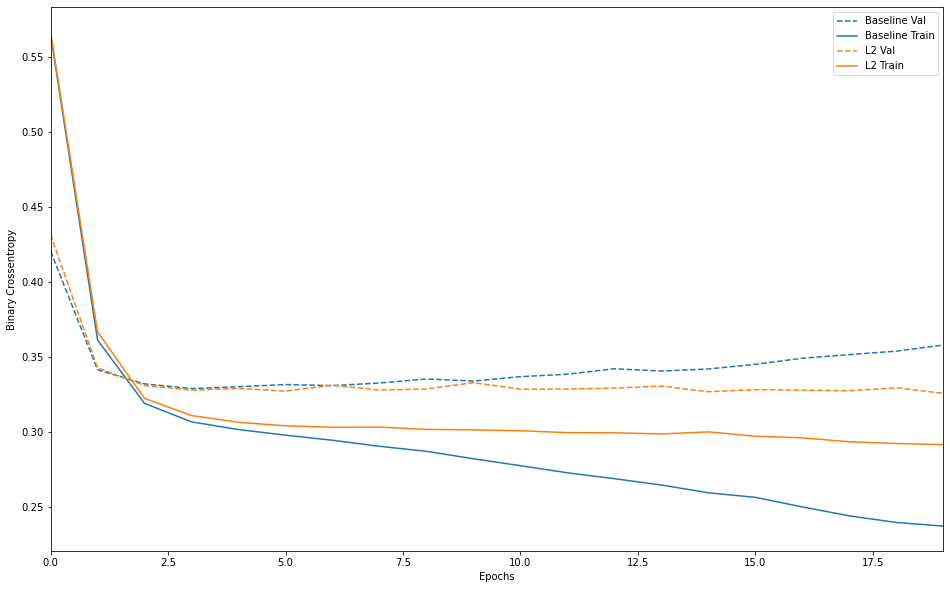

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6845 - accuracy: 0.5500 - binary_crossentropy: 0.6845 - val_loss: 0.6253 - val_accuracy: 0.7366 - val_binary_crossentropy: 0.6253
Epoch 2/20
49/49 - 0s - loss: 0.5926 - accuracy: 0.6796 - binary_crossentropy: 0.5926 - val_loss: 0.4778 - val_accuracy: 0.8213 - val_binary_crossentropy: 0.4778
Epoch 3/20
49/49 - 0s - loss: 0.4960 - accuracy: 0.7720 - binary_crossentropy: 0.4960 - val_loss: 0.3952 - val_accuracy: 0.8446 - val_binary_crossentropy: 0.3952
Epoch 4/20
49/49 - 0s - loss: 0.4369 - accuracy: 0.8109 - binary_crossentropy: 0.4369 - val_loss: 0.3532 - val_accuracy: 0.8530 - val_binary_crossentropy: 0.3532
Epoch 5/20
49/49 - 0s - loss: 0.4014 - accuracy: 0.8335 - binary_crossentropy: 0.4014 - val_loss: 0.3311 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3311
Epoch 6/20
49/49 - 0s - loss: 0.3807 - accuracy: 0.8438 - binary_crossentropy: 0.3807 - val_loss: 0.3264 - val_accuracy: 0.8580 - val_binary_crossentropy: 0.3264
Epoch 7/20
49/49 - 0s - loss

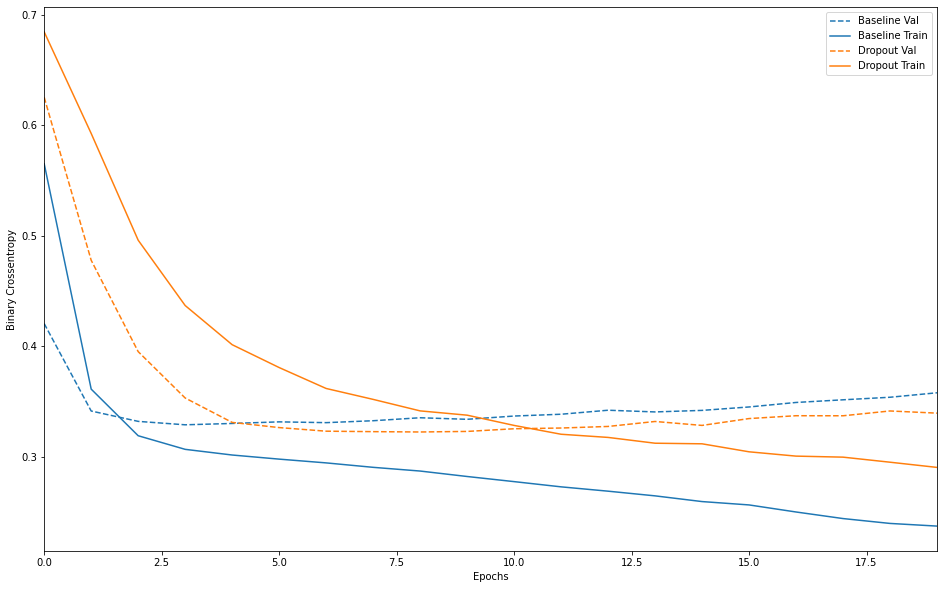

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])